In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', None)
pd.set_option("display.max_rows", None)

In [252]:
plt.style.use('ggplot')

In [253]:
file = '/Users/tim/Documents/GitHub/pandas_additional/data/rollercoaster.csv'
df = pd.read_csv(file)

### Step 1: Data Understanding

In [254]:
df.shape

(1087, 56)

In [255]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [256]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [257]:
df.dtypes

coaster_name         object
Length               object
Speed                object
Location             object
Status               object
                     ...   
height_value        float64
height_unit          object
height_ft           float64
Inversions_clean      int64
Gforce_clean        float64
Length: 56, dtype: object

In [258]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


    Subsetting dataframe

In [259]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [260]:
df_subset = df[['coaster_name', 'Location', 'Status', 'Manufacturer', 
        'year_introduced', 'latitude', 'longitude', 'Type_Main', 
        'opening_date_clean', 'speed_mph', 'height_ft', 
        'Inversions_clean', 'Gforce_clean']].copy()

In [261]:
df_subset.shape

(1087, 13)

In [262]:
df_subset.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
                       ...   
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
Length: 13, dtype: object

In [263]:
df_subset['opening_date_clean'] = pd.to_datetime(df_subset['opening_date_clean'])

In [264]:
df_subset.rename(columns={'coaster_name': 'Coaster_Name',
                          'year_introduced': 'Year_Introduced',
                          'opening_date_clean': 'Opening_Date',
                          'speed_mph':'Speed_mph',
                          'height_ft': 'Height_ft',
                          'Inversions_clean': 'Inversions',
                          'Gforce_clean': 'Gforce'},
                inplace=True)

    Summing up null values

In [265]:
df_subset.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
                  ... 
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
Length: 13, dtype: int64

### Data Cleaning 'Status'

### Data Cleaning 'Opening Date'

In [336]:
def data_cleaning_date(date_input):
    date_input = str(date_input)
    if date_input.isdigit() and len(date_input) == 4:
        return f'January 1, {date_input}'
    elif len(date_input) > 4:
        return date_input

In [337]:
df['test_opening_date'] = df['Opening date'].apply(data_cleaning_date)

In [340]:
df['test_opening_date'].value_counts()

January 1, 1999                                                                7
January 1, 1998                                                                7
January 1, 1972                                                                7
January 1, 1976                                                                7
May 8, 1999                                                                    6
January 1, 2022                                                                6
January 1, 1975                                                                6
January 1, 1979                                                                5
January 1, 1981                                                                5
January 1, 1983                                                                5
May 5, 2000                                                                    5
January 1, 1989                                                                5
January 1, 1985             

In [346]:
df[df['Opening date'] == "February 8, 2001(as Mullholland Madness)July 1, 2011(as Goofy's Sky School)"]

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean,test_opening_date
574,Goofy's Sky School,"1,200 ft (370 m)",27 mph (43 km/h),Disney California Adventure,Operating,"February 8, 2001(as Mullholland Madness)July 1...",Steel €“ Wild Mouse,Mack Rides,42 in (107 cm),NaN,55 ft (17 m),0.0,Chain lift hill,NaN,Several trains with a single car. Riders are a...,Paradise Gardens Park,1:45,NaN,NaN,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"October 12, 2010(as Mulholland Madness)",NaN,NaN,NaN,NaN,Must transfer from wheelchair,NaN,Single rider line available,NaN,NaN,NaN,NaN,NaN,2001,33.8063,-117.923,Steel,2001-02-08,27 mph,43 km/h,27.0,mph,27.0,55.0,ft,NaN,0,NaN,"February 8, 2001(as Mullholland Madness)July 1..."
580,Mulholland Madness,"1,200 ft (370 m)",27 mph (43 km/h),Disney California Adventure,Operating,"February 8, 2001(as Mullholland Madness)July 1...",Steel €“ Wild Mouse,Mack Rides,42 in (107 cm),NaN,55 ft (17 m),0.0,Chain lift hill,NaN,Several trains with a single car. Riders are a...,Paradise Gardens Park,1:45,NaN,NaN,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"October 12, 2010(as Mulholland Madness)",NaN,NaN,NaN,NaN,Must transfer from wheelchair,NaN,Single rider line available,NaN,NaN,NaN,NaN,NaN,2001,33.8063,-117.923,Steel,2001-02-08,27 mph,43 km/h,27.0,mph,27.0,55.0,ft,NaN,0,NaN,"February 8, 2001(as Mullholland Madness)July 1..."


In [342]:
df.loc[40, :]

coaster_name                                              Sesquicentennial Cyclone
Length                                                            2,000 ft (610 m)
Speed                                                                          NaN
Location                                               Sesquicentennial Exposition
Status                                                                     Removed
Opening date                                                          May 31, 1926
Type                                                                          Wood
Manufacturer                                                    Traver Engineering
Height restriction                                                             NaN
Model                                                                          NaN
Height                                                                60 ft (18 m)
Inversions                                                                     NaN
Lift

### Step 2: Data Preparation

In [266]:
df_subset[df_subset.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [267]:
df[df['coaster_name'].duplicated()].head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,96 ft (29 m),NaN,Chain-lift,"$176,000 CDN",NaN,Cyclone Bay,1:10,85 riders per hour,4 Gs,Harry G. Traver,59°,90 ft (27 m),NaN,NaN,NaN,Twister,NaN,NaN,"September 2, 1946",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,NaN,0,4.0
60,Derby Racer,NaN,NaN,Revere Beach,Removed,1911,Wood €“ Racing,Fred W. Pearce,NaN,NaN,NaN,0.0,NaN,"$140,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Figure Eight,NaN,NaN,1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,"May 23, 1938",Wood,NaN,NaN,Out and Back roller coaster,77 ft (23 m),0.0,NaN,NaN,Single train with 3 cars. Riders are arranged ...,NaN,2:20,NaN,NaN,Ed Vettel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50 mph,80 km/h,50.0,mph,50.0,77.0,ft,NaN,0,NaN
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,NaN,NaN,Steel €“ Mine Train,Arrow Development (California and Florida)Dyna...,40 in (102 cm),Mine Train,104 ft (32 m),0.0,Chain lift hill,NaN,NaN,NaN,~3:00,NaN,NaN,Walt Disney Imagineering,NaN,NaN,NaN,NaN,Mine Train Through Nature's Wonderland,Custom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,NaN,Single rider line available,NaN,NaN,NaN,Single Lap Bar,NaN,1980,NaN,NaN,Steel,NaN,35 mph,56 km/h,35.0,mph,35.0,104.0,ft,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Steel €“ Powered €“ Mine Train,Mack Rides,102 cm (3 ft 4 in),NaN,10 m (33 ft),0.0,NaN,$2.7M est.,Single train with 10 cars. Riders are arranged...,International Festival,1:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,64 km/h,40 mph,64.0,km/h,39.8,10.0,m,32.8,0,NaN


In [268]:
df['coaster_name'].duplicated().sum()

97

In [269]:
df_subset_rmdup = df_subset[~df_subset[['Coaster_Name', 'Location', 'Opening_Date']].duplicated()].reset_index(drop=True).copy()

In [270]:
df_subset_rmdup.shape

(990, 13)

### Univariate Analysis

In [271]:
df_subset_rmdup.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [272]:
df_subset_rmdup.head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [276]:
# Opening_Date is omitted
continuous_var = ['Year_Introduced', 'latitude', 'longitude', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']
categorical_var = ['Location', 'Status', 'Manufacturer', 'Type_Main']

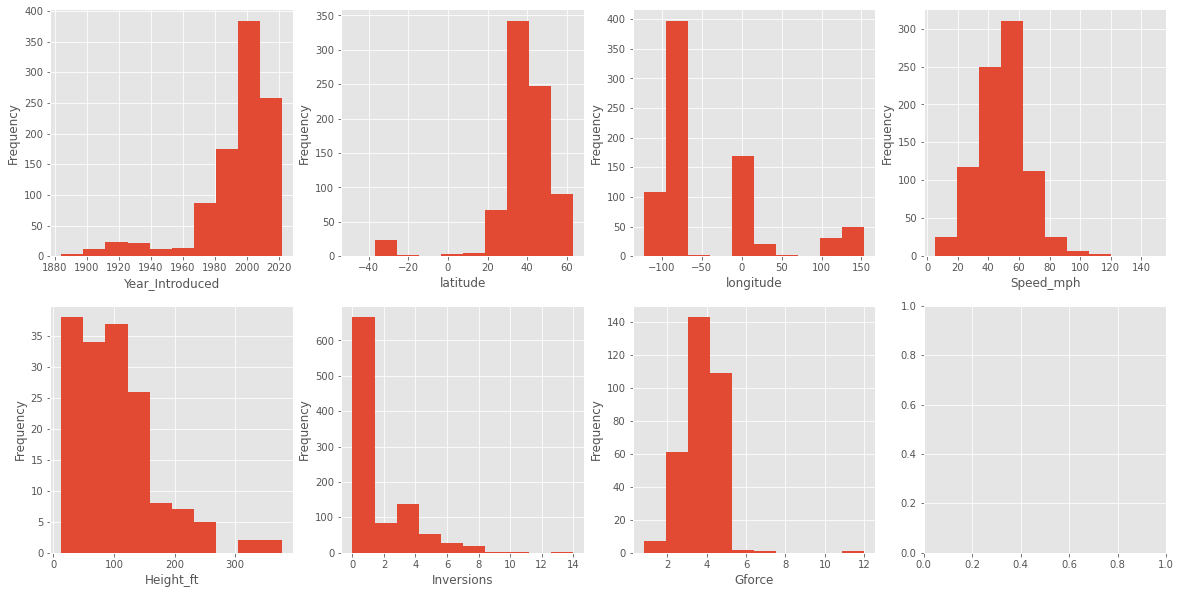

In [278]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20, 10)

for index, column in enumerate(continuous_var):
    a = df_subset_rmdup[column].plot.hist(ax=ax.flatten()[index])
    a.set_xlabel(column)

plt.show()

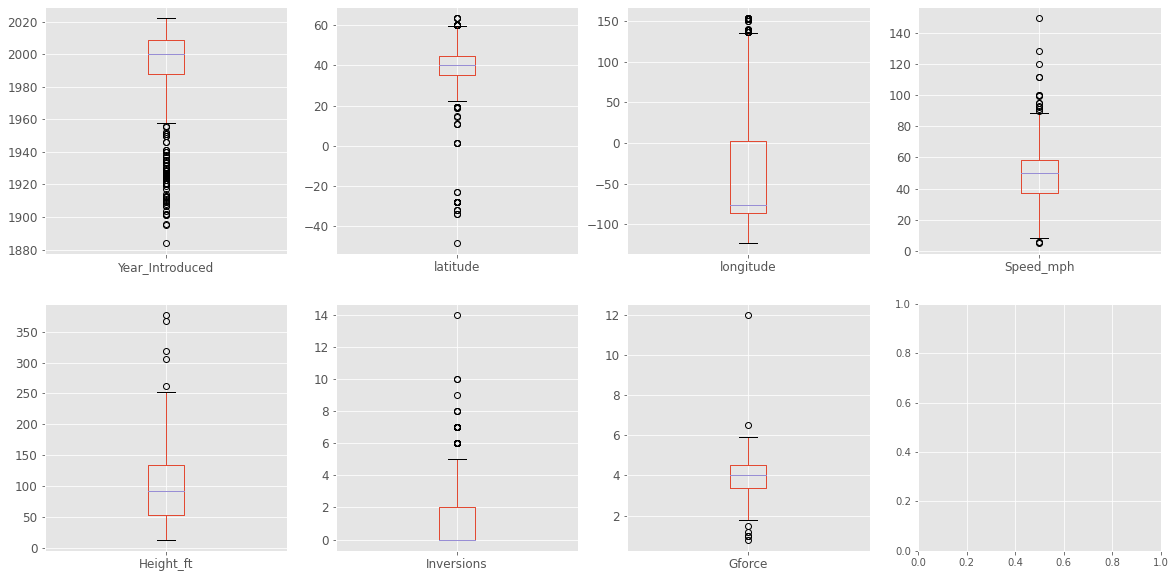

In [279]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20, 10)

for index, column in enumerate(continuous_var):
    a = df_subset_rmdup.boxplot(column, ax = ax.flatten()[index], fontsize='large')

plt.show()

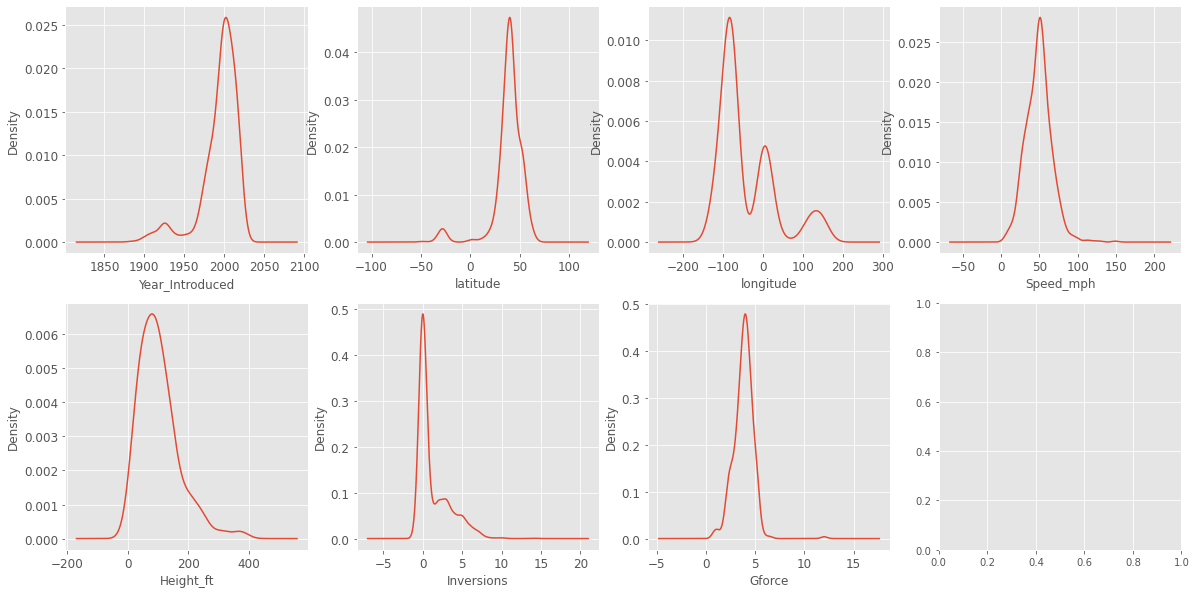

In [281]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20, 10)

for index, column in enumerate(continuous_var):
    a = df_subset_rmdup[column].plot(kind='kde', ax=ax.flatten()[index], fontsize='large')
    a.set_xlabel(column)

plt.show()

### Feature Relationship

In [282]:
df_subset_rmdup.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

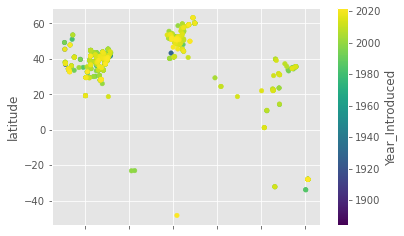

In [283]:
df_subset_rmdup.plot(kind='scatter', x='longitude',
                     y='latitude', c='Year_Introduced', colormap='viridis')


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

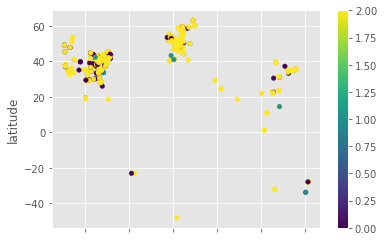

In [284]:
df_subset_rmdup.plot(kind='scatter', x='longitude',
                     y='latitude', c=pd.factorize(df_subset_rmdup['Type_Main'])[0], colormap='viridis')

# wood = 0 , other = 1, steel = 2

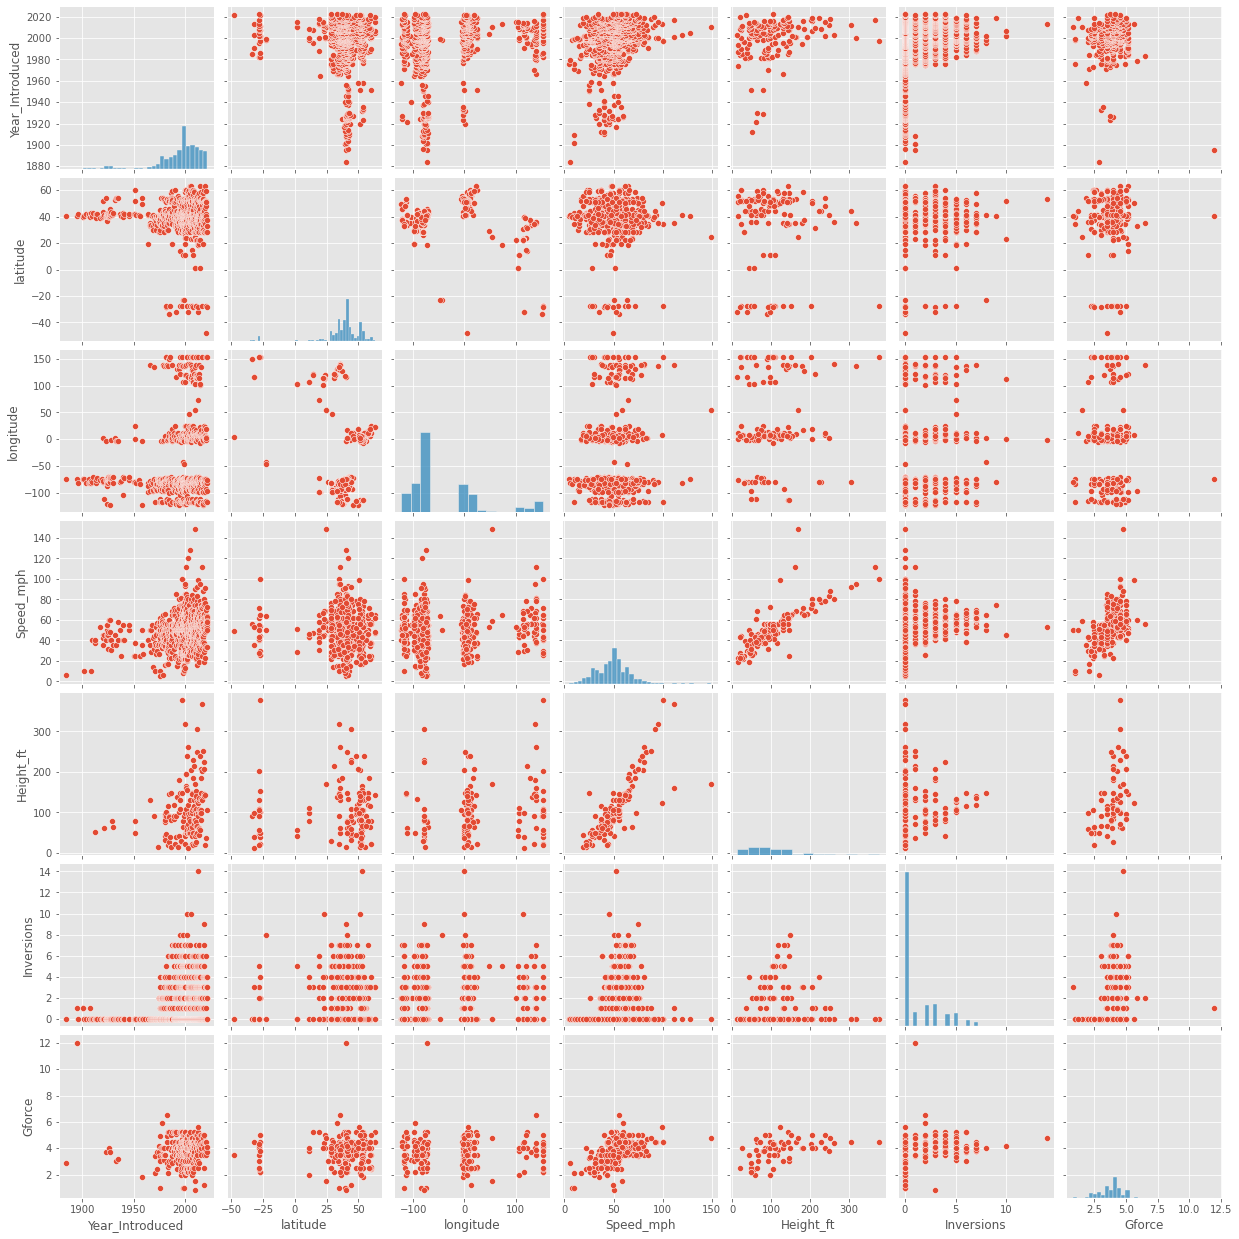

In [285]:
sns.pairplot(df_subset_rmdup)

In [290]:
df_subset_rmdup.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


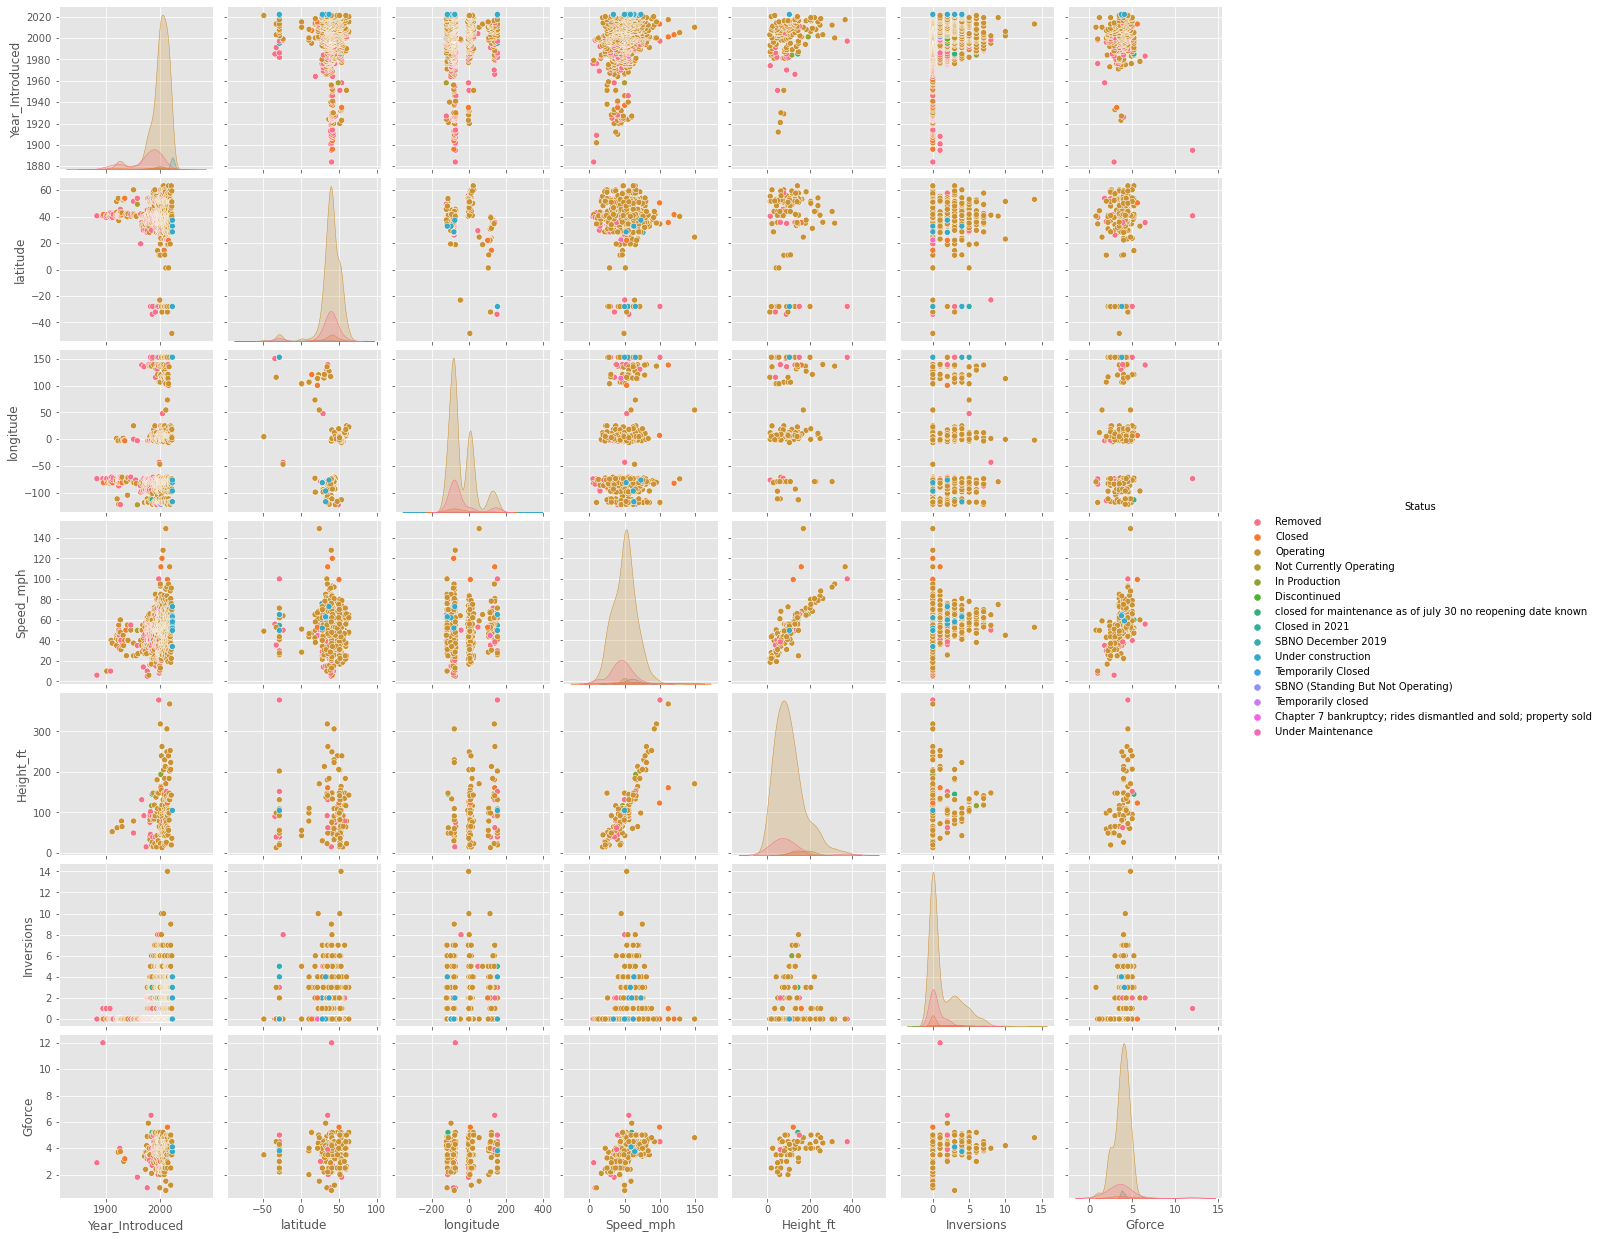

In [291]:
sns.pairplot(df_subset_rmdup, hue='Status')

In [ ]:
sns.scatterplot()

### CHALLENGE: Try to clean df['Length] and merge the cleaned results back into the main dataframe

In [59]:
df['Length'].value_counts

<bound method IndexOpsMixin.value_counts of 0             600 ft (180 m)
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                ...         
1082      3,444 ft (1,050 m)
1083      3,328 ft (1,014 m)
1084    3,169.3 ft (966.0 m)
1085          770 ft (230 m)
1086      3,300 ft (1,000 m)
Name: Length, Length: 1087, dtype: object>

In [166]:
test = df['Length'].str.split(' ').to_frame()

In [167]:
# test['length_ft'] 

test_expanded = test['Length'].apply(pd.Series)

In [174]:
test_expanded[test_expanded[[4,5,6,7,8,9]].notnull().any(axis=1)].index

Int64Index([312, 332, 348, 367, 414, 455, 470, 499, 625, 1042], dtype='int64')

In [175]:
df.loc[[312, 332, 348, 367, 414, 455, 470, 499, 625, 1042]]


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
312,Batman: The Ride,"2,693 or 2,700 ft (821 or 823 m)",50 mph (80 km/h),Other,NaN,NaN,Steel €“ Inverted,Bolliger & Mabillard,54 in (137 cm),Inverted Coaster €“ Batman,100 or 105 ft (30 or 32 m),5.0,Chain lift hill,NaN,2 trains with 8 cars. Riders are arranged 4 ac...,NaN,1:45,1280€“1400[1][2] riders per hour,4,Werner Stengel,NaN,84.5 ft[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single rider line available,Over-the-shoulder,Flash Pass available,NaN,NaN,NaN,1992,NaN,NaN,Steel,NaN,50 mph,80 km/h,50.0,mph,50.0,100.0,ft,NaN,5,4.0
332,Batman: The Ride,"2,693 or 2,700 ft (821 or 823 m)",50 mph (80 km/h),Other,NaN,NaN,Steel €“ Inverted,Bolliger & Mabillard,54 in (137 cm),Inverted Coaster €“ Batman,100 or 105 ft (30 or 32 m),5.0,Chain lift hill,NaN,2 trains with 8 cars. Riders are arranged 4 ac...,NaN,1:45,1280€“1400[1][2] riders per hour,4,Werner Stengel,NaN,84.5 ft[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single rider line available,Over-the-shoulder,Flash Pass available,NaN,NaN,NaN,1993,NaN,NaN,Steel,NaN,50 mph,80 km/h,50.0,mph,50.0,100.0,ft,NaN,5,4.0
348,Batman: The Ride,"2,693 or 2,700 ft (821 or 823 m)",50 mph (80 km/h),Other,NaN,NaN,Steel €“ Inverted,Bolliger & Mabillard,54 in (137 cm),Inverted Coaster €“ Batman,100 or 105 ft (30 or 32 m),5.0,Chain lift hill,NaN,2 trains with 8 cars. Riders are arranged 4 ac...,NaN,1:45,1280€“1400[1][2] riders per hour,4,Werner Stengel,NaN,84.5 ft[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single rider line available,Over-the-shoulder,Flash Pass available,NaN,NaN,NaN,1994,NaN,NaN,Steel,NaN,50 mph,80 km/h,50.0,mph,50.0,100.0,ft,NaN,5,4.0
367,Batman: The Ride,"2,693 or 2,700 ft (821 or 823 m)",50 mph (80 km/h),Other,NaN,NaN,Steel €“ Inverted,Bolliger & Mabillard,54 in (137 cm),Inverted Coaster €“ Batman,100 or 105 ft (30 or 32 m),5.0,Chain lift hill,NaN,2 trains with 8 cars. Riders are arranged 4 ac...,NaN,1:45,1280€“1400[1][2] riders per hour,4,Werner Stengel,NaN,84.5 ft[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single rider line available,Over-the-shoulder,Flash Pass available,NaN,NaN,NaN,1995,NaN,NaN,Steel,NaN,50 mph,80 km/h,50.0,mph,50.0,100.0,ft,NaN,5,4.0
414,Batman: The Ride,"2,693 or 2,700 ft (821 or 823 m)",50 mph (80 km/h),Other,NaN,NaN,Steel €“ Inverted,Bolliger & Mabillard,54 in (137 cm),Inverted Coaster €“ Batman,100 or 105 ft (30 or 32 m),5.0,Chain lift hill,NaN,2 trains with 8 cars. Riders are arranged 4 ac...,NaN,1:45,1280€“1400[1][2] riders per hour,4,Werner Stengel,NaN,84.5 ft[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single rider line available,Over-the-shoulder,Flash Pass available,NaN,NaN,NaN,1997,NaN,NaN,Steel,NaN,50 mph,80 km/h,50.0,mph,50.0,100.0,ft,NaN,5,4.0
455,Roar (roller coaster),"3,468 ft (1,057 m) (America)3,291 ft (1,003 m)...",50.5 mph (81.3 km/h),Other,NaN,NaN,Wood,Great Coasters International,48 in (122 cm),NaN,95 ft (29 m),0.0,Chain lift hill,NaN,2 trains with 6 cars. Riders are arranged 2 ac...,NaN,1:52,NaN,3.5,NaN,50°,85 ft (26 m),NaN,NaN,NaN,Twister,NaN,NaN,"August 16, 2015",NaN,The Joker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,NaN,NaN,Wood,NaN,50.5 mph,81.3 km/h,50.5,mph,50.5,95.0,ft,NaN,0,3.5
470,Batman: The Ride,"2,693 or 2,700 ft (821 or 823 m)",50 mph (80 km/h),Other,NaN,NaN,Steel €“ Inverted,Bolliger & Mabilla

In [169]:
test_expanded[test_expanded[4].isin(['(821)', '(America)3,291', 'm)'])]

,0,1,2,3,4,5,6,7,8,9
455,"3,468",ft,"(1,057",m),"(America)3,291",ft,"(1,003",m),(Discovery,Kingdom)
499,"3,468",ft,"(1,057",m),"(America)3,291",ft,"(1,003",m),(Discovery,Kingdom)
1042,863,,ft,(263,m),NaN,NaN,NaN,NaN,NaN


In [92]:
test_expanded.loc[1042, 1] = test_expanded.loc[1042, 2]
test_expanded.loc[1042, 2] = test_expanded.loc[1042, 3]
test_expanded.loc[1042, 3] = test_expanded.loc[1042, 4]

In [93]:
test_expanded[test_expanded[4].isin(['(821)', '(America)3,291', 'm)'])]

,0,1,2,3,4,5,6,7,8,9
455,"3,468",ft,"(1,057",m),"(America)3,291",ft,"(1,003",m),(Discovery,Kingdom)
499,"3,468",ft,"(1,057",m),"(America)3,291",ft,"(1,003",m),(Discovery,Kingdom)
1042,863,ft,(263,m),m),NaN,NaN,NaN,NaN,NaN


In [106]:
test_expanded[test_expanded[0].replace(',', '').str.isnumeric() != True][0]

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
         ...   
1081    1,000.0
1082      3,444
1083      3,328
1084    3,169.3
1086      3,300
Name: 0, Length: 897, dtype: object

In [110]:
test_expanded

,0,1,2,3,4,5,6,7,8,9
0,600,ft,(180,m),NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1082,"3,444",ft,"(1,050",m),NaN,NaN,NaN,NaN,NaN,NaN
1083,"3,328",ft,"(1,014",m),NaN,NaN,NaN,NaN,NaN,NaN
1084,"3,169.3",ft,(966.0,m),NaN,NaN,NaN,NaN,NaN,NaN
1085,770,ft,(230,m),NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
test_expanded[0] = test_expanded[0].str.replace(',', '')
test_expanded[0] = test_expanded[0].str.replace(' ', '')

In [142]:
test_expanded[test_expanded[0].str.replace('.', '').str.isdigit() == False]

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_49225/1884255414.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_expanded[test_expanded[0].str.replace('.', '').str.isdigit() == False]


,0,1,2,3,4,5,6,7,8,9
615,2759€“2798,ft,(841€“853,m),NaN,NaN,NaN,NaN,NaN,NaN
639,2759€“2798,ft,(841€“853,m),NaN,NaN,NaN,NaN,NaN,NaN
832,1040[2],ft,(320,m),NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
test_expanded[0] = test_expanded[0].str.replace('€“2798', '')
test_expanded[0] = test_expanded[0].str.replace('[2]', '')
test_expanded.loc[832,0] = test_expanded.loc[832,0].replace('[]', '')

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_49225/2499611315.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_expanded[0] = test_expanded[0].str.replace('[2]', '')


In [156]:
test_expanded[test_expanded[0].str.replace('.', '').str.isdigit() == False]

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_49225/1884255414.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_expanded[test_expanded[0].str.replace('.', '').str.isdigit() == False]


,0,1,2,3,4,5,6,7,8,9


In [158]:
test_expanded[0] = test_expanded[0].astype('float')

In [165]:
test_expanded.loc[[615,639,832], :]

,0,1,2,3,4,5,6,7,8,9
615,759.0,ft,(841€“853,m),NaN,NaN,NaN,NaN,NaN,NaN
639,759.0,ft,(841€“853,m),NaN,NaN,NaN,NaN,NaN,NaN
832,1040.0,ft,(320,m),NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
print(df['Status'].value_counts())

Operating             668
Removed               137
Closed                 43
Under Construction     26
Name: Status, dtype: int64


In [312]:
df['Status'].replace(['In Production', 'Under construction'], 'Under Construction', inplace=True)
df['Status'].replace(['Under Maintenance','Temporarily closed', 
                      'Temporarily Closed', 'closed for maintenance as of july 30 no reopening date known', 
                      'Not Currently Operating', 'Closed in 2021', 'SBNO December 2019', 
                      'SBNO (Standing But Not Operating)', 'Discontinued',
                      'Chapter 7 bankruptcy; rides dismantled and sold; property sold'], 'Closed', inplace=True)